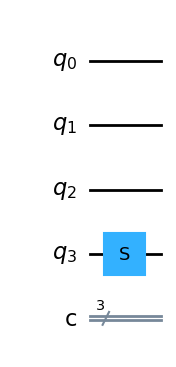

In [58]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeQasmBackend
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

qpe = QuantumCircuit(4, 3)
qpe.s(3)
qpe.draw('mpl')

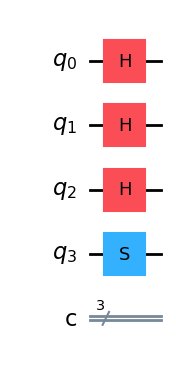

In [59]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

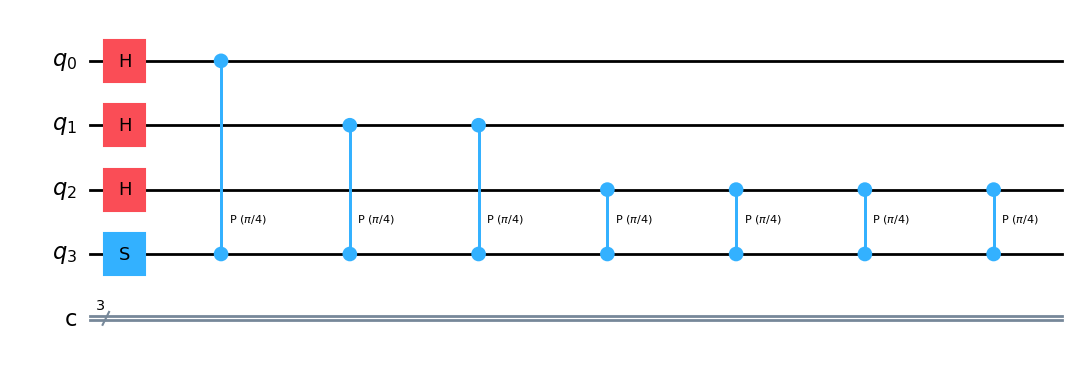

In [60]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qpe.draw('mpl')

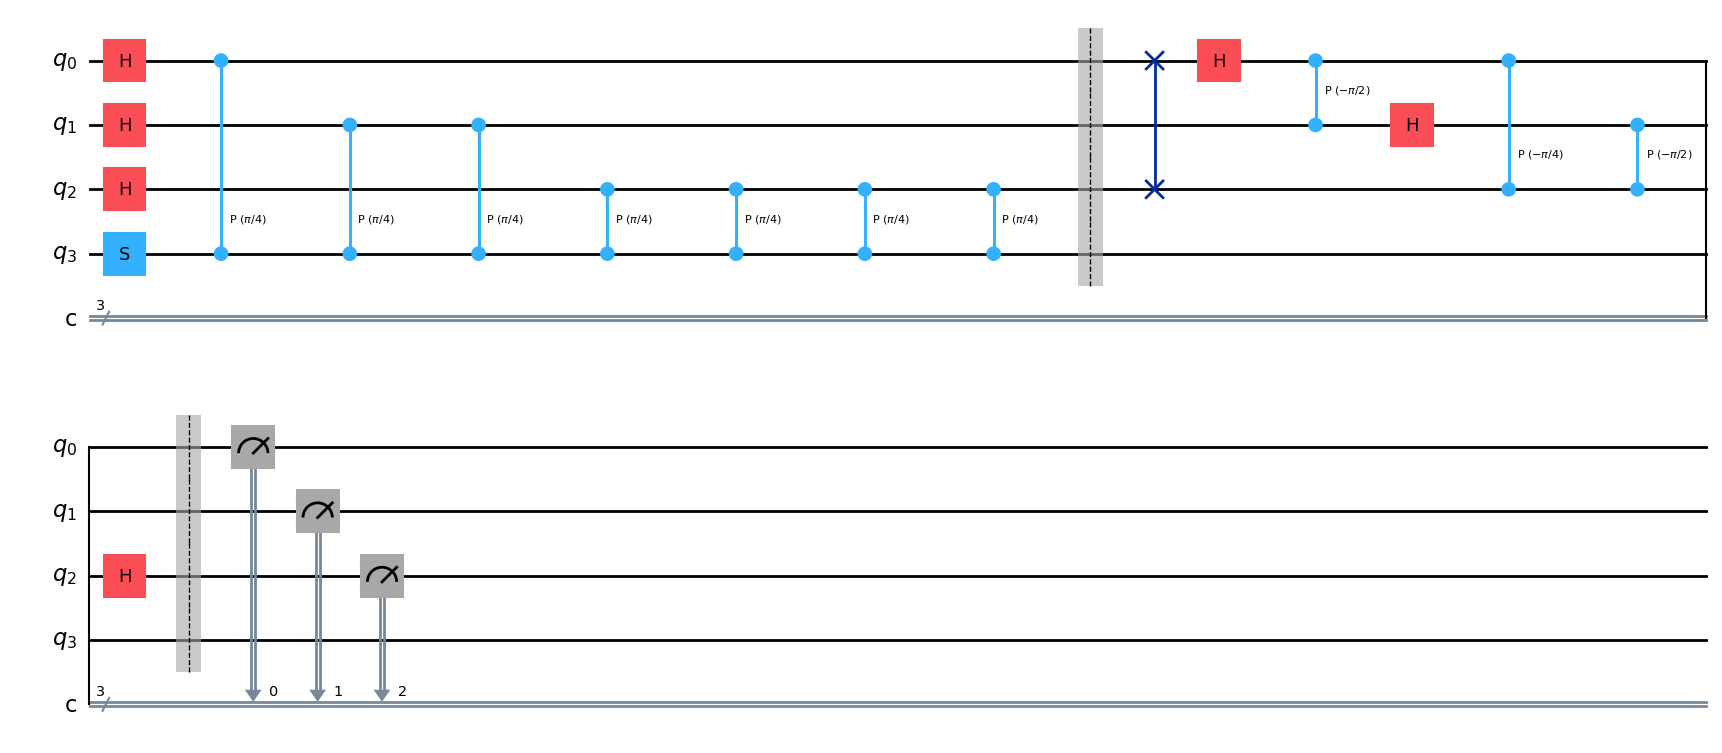

In [61]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)
qpe.draw('mpl')

     ┌───┐                                                                ░    »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─»
     ├───┤ │                                                              ░  │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼─»
     ├───┤ │        │        │                                            ░  │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░    »
q_3: ┤ S ├─■────────■────────■────────■────────■────────■────────■────────░────»
     └───┘                                                                ░    »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐                                         ░ ┌─┐      
«q_0: ┤ H ├─■──────────────■─────────────────

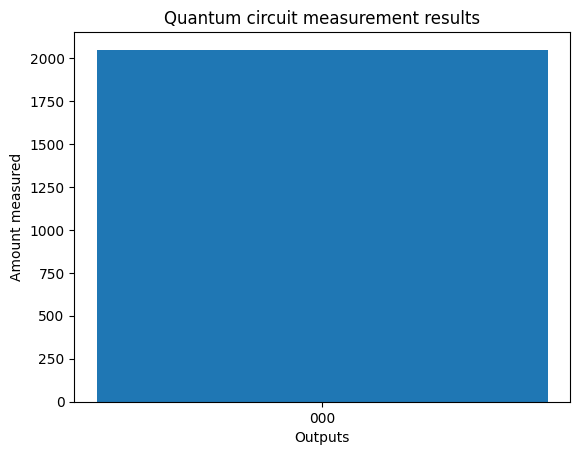

In [62]:
shots = 2048
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 
    for i in RR: 
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

res = RunSim(qpe, shots)
print(qpe)
PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()